In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import cv2
import pywt
import matplotlib.pyplot as plt
from tensorflow import keras as kr

In [2]:
img=cv2.imread("./test_image/hima.jpg")

In [3]:
img.shape

(3200, 1440, 3)

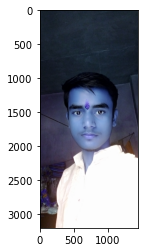

In [4]:
plt.imshow(img)

In [5]:
bgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [6]:
bgray.shape

(3200, 1440)

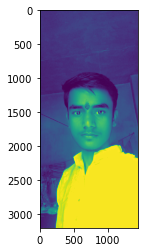

In [7]:
plt.imshow(bgray)

In [8]:
face_cascade=cv2.CascadeClassifier("./opencv/frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("./opencv/haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(bgray,1.3,5)
faces

array([[ 326, 1188,  816,  816]], dtype=int32)

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(326, 1188, 816, 816)

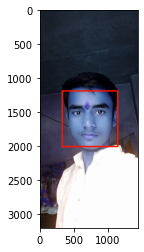

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,22,0),20) # for creating a rectangle
plt.imshow(face_img)

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),20)
    roi_gray=bgray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),20)
        

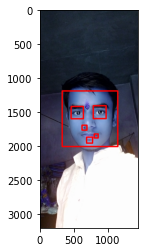

In [12]:
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

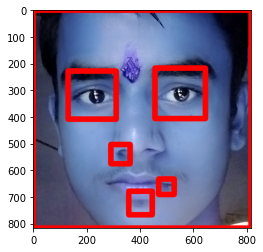

In [13]:
plt.imshow(roi_color,cmap='gray')

In [14]:
cropped_img=np.array(roi_color)
cropped_img.shape

(816, 816, 3)

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    

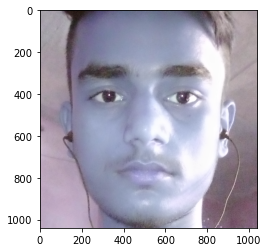

In [16]:
org_img=get_cropped_image_if_2_eyes('./test_image/bhai.jpg')
plt.imshow(org_img)

In [17]:
# fatkum batch download image

In [18]:
#cd..

In [19]:
# create new folder 
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped/"

In [20]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./datasets/abhay', './datasets/cropped', './datasets/ramu_kaka']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [23]:
for img_dir in img_dirs:
        for entry in os.scandir(img_dir):
            print(entry.path)

./datasets/abhay\allu (1).jpg
./datasets/abhay\allu (10).jpg
./datasets/abhay\allu (11).jpg
./datasets/abhay\allu (12).jpg
./datasets/abhay\allu (13).jpg
./datasets/abhay\allu (14).jpg
./datasets/abhay\allu (15).jpg
./datasets/abhay\allu (16).jpg
./datasets/abhay\allu (17).jpg
./datasets/abhay\allu (18).jpg
./datasets/abhay\allu (19).jpg
./datasets/abhay\allu (2).jpg
./datasets/abhay\allu (20).jpg
./datasets/abhay\allu (3).jpg
./datasets/abhay\allu (4).jpg
./datasets/abhay\allu (5).jpg
./datasets/abhay\allu (6).jpg
./datasets/abhay\allu (7).jpg
./datasets/abhay\allu (8).jpg
./datasets/abhay\allu (9).jpg
./datasets/ramu_kaka\elon (1).jpg
./datasets/ramu_kaka\elon (10).jpg
./datasets/ramu_kaka\elon (11).jpg
./datasets/ramu_kaka\elon (12).jpg
./datasets/ramu_kaka\elon (13).jpg
./datasets/ramu_kaka\elon (14).jpg
./datasets/ramu_kaka\elon (15).jpg
./datasets/ramu_kaka\elon (16).jpg
./datasets/ramu_kaka\elon (17).jpg
./datasets/ramu_kaka\elon (18).jpg
./datasets/ramu_kaka\elon (19).jpg
./dat

In [24]:
cropped_image_dirs=[]
celebrity_file_name_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_name_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped image in folder:",cropped_folder)
             
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count +=1


generating cropped image in folder: ./datasets/cropped/abhay


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [28]:
class_dict={}
count=0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
print(class_dict)


{'abhay': 0, 'cropped': 1}


In [29]:
def w2d(img,mode,level):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    # computer coaficiant
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    # process coaficiant
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    # reconstruction 
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    
    return imArray_H
    

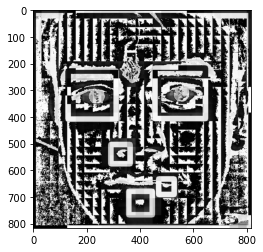

In [30]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [31]:
x,y=[],[]
for celebrity_name,training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_image=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        x.append(combined_image)
        y.append(class_dict[celebrity_name])

In [32]:
len(x)

13

In [33]:
len(x[0])
x[0]

array([[ 11],
       [ 18],
       [ 15],
       ...,
       [ 44],
       [ 42],
       [121]], dtype=uint8)

In [34]:
x[0]

array([[ 11],
       [ 18],
       [ 15],
       ...,
       [ 44],
       [ 42],
       [121]], dtype=uint8)

In [36]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(13, 4096)

In [37]:
x[0]

array([ 11.,  18.,  15., ...,  44.,  42., 121.])

In [ ]:
# training through SVM

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'sklearn'

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
clf=svc(kernel='rbf')

#fighting x sample and y classe
clf.fit(x_train,y_train)

NameError: name 'train_test_split' is not defined

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
svm_obj=SVC()
fr_model=svm_obj.fit(x_train,y_trian)
y_pred=fr_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
# pip install joblib
import joblib
# save the model as a pickle in a file
joblib.dump(clf.predict,'saved_model.pkl')

In [ ]:
# kon boot , how to unlock computer without password

In [ ]:
# SAM file,system32/config

In [ ]:
# safe mood